In [1]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Data visualization 
## Fundamentals and python tools

## what we will do:

+ Talk more about _what makes_ a figure good in general than _how to make_ a good figure with a specific tool.
+ Basic plot elements, and how to represent types of data.
+ <span style="color:Red">C</span><span style="color:#FF7F00">o</span><span style="color:#00FF00">l</span><span style="color: #96bf33">o</span><span style="color:#0000FF">r</span> is important!
+ Plotting with Matplotlib
+ Interactive plotting


In [2]:
# import all the stuff 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style('white')

<center><img src="hex_lion_alain_bengio.png" width=1200><center/>
G. Alain, Y. Bengio. _Understanding intermediate layers using linear classifier probes_. 2016

## Basic Plotting Elements

# Choose the right color palette
Color maps are build sampling from the color space. For quantitative data, the color map must be perceptually uniform. This means that the colors that represent low values must be percieved darker than the colors for higher values. Also, the perceptual brightness of the color must increase in a continuous uniform way.

## Color palettes:

>Color is more important than other aspects of figure style because color can reveal patterns in the data if used effectively or hide those patterns if used poorly

[source](Color is more important than other aspects of figure style because color can reveal patterns in the data if used effectively or hide those patterns if used poorly)

### Qualitative color palettes
Distinguish discrete chunks of data that do not have an inherent ordering.

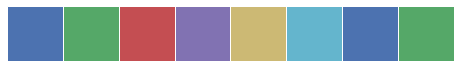

In [3]:
sns.set(rc={"figure.figsize": (8, 8)})
np.random.seed(sum(map(ord, "palettes")))

current_palette = sns.color_palette(n_colors=8)
sns.palplot(current_palette)

Circular color space:

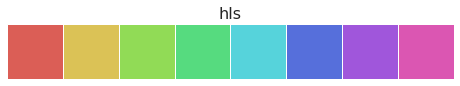

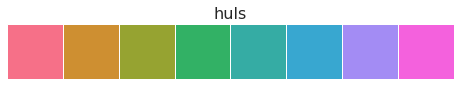

In [4]:
sns.palplot(sns.color_palette("hls", 8))
plt.title('hls', fontsize=16)
sns.palplot(sns.color_palette("husl", 8))
plt.title('huls', fontsize=16)
plt.show()

### Sequential color palettes

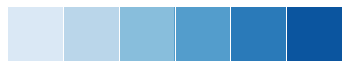

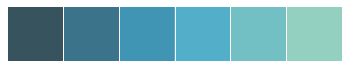

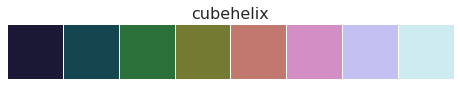

In [5]:
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("GnBu_d"))
sns.palplot(sns.color_palette("cubehelix", 8))
plt.title('cubehelix', fontsize=16)
plt.show()

#### Perceptually uniform sequential color maps

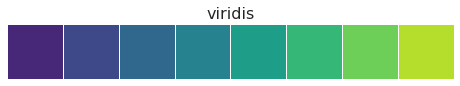

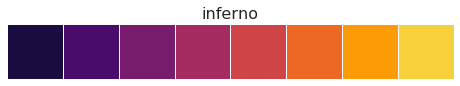

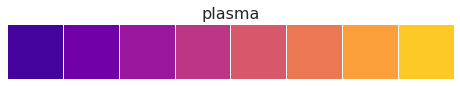

In [6]:
sns.palplot(sns.color_palette("viridis", 8))
plt.title('viridis', fontsize=16)
sns.palplot(sns.color_palette("inferno", 8))
plt.title('inferno', fontsize=16)
sns.palplot(sns.color_palette("plasma", 8))
plt.title('plasma', fontsize=16)
plt.show()

[Presentation at Scipy 2015](https://www.youtube.com/watch?v=xAoljeRJ3lU)

### Diverging color palettes

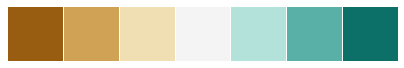

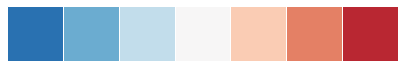

In [7]:
sns.palplot(sns.color_palette("BrBG", 7))
sns.palplot(sns.color_palette("RdBu_r", 7))

## The bad and ugly
for example, let's take a look at the following picture made with the color map Jet. 

How do you think is the data represented in the following picture. Does it have any gaps? or is smooth?

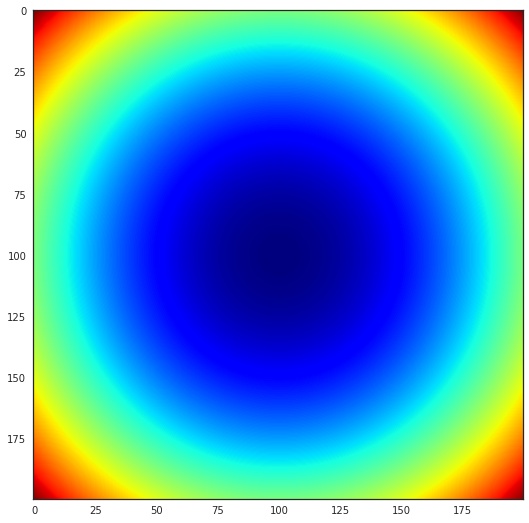

In [8]:
sns.set_style('white')

def smooth_circle(x, y):
    return (x**2+y**2)

# make these smaller to increase the resolution
dx, dy = 0.01, 0.01

x = np.arange(-1, 1, dx)
y = np.arange(-1, 1, dy)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(9,9))
Z = smooth_circle(X, Y)
img = plt.imshow(Z, cmap=plt.cm.jet, interpolation='bilinear')
plt.show()

Let's look at an intersection

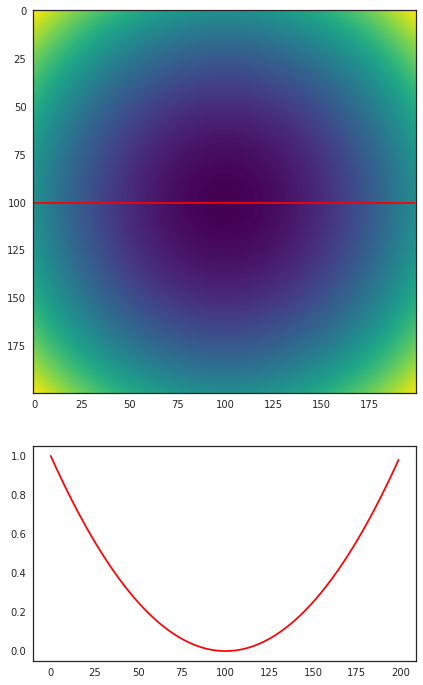

In [9]:
fig = plt.figure(figsize=(6, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]) 
ax0 = plt.subplot(gs[0])
ax0.imshow(Z, cmap=plt.cm.viridis, interpolation='bilinear')
ax0.hlines(100,0,199, colors='red')
ax1 = plt.subplot(gs[1])
ax1.plot(Z[100,:], c='red')

plt.tight_layout()

### Find the gap!

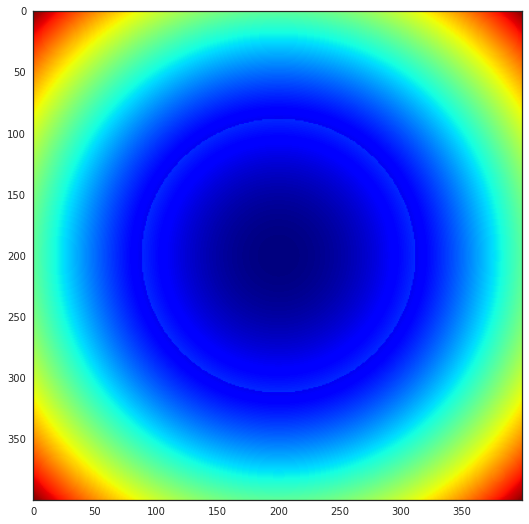

In [10]:
def gap_circle(x, y):
        z = x**2 + y**2
        z[z > 1.25] -= 0.5
        return z
    
# make these smaller to increase the resolution
dx, dy = 0.01, 0.01

x = np.arange(-2, 2, dx)
y = np.arange(-2, 2, dy)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(9,9))
Z2 = gap_circle(X, Y)
img2 = plt.imshow(Z2, cmap=plt.cm.jet, interpolation='bilinear')
plt.show()

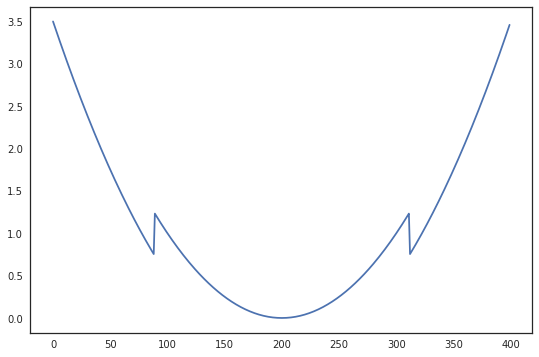

In [11]:
plt.figure(figsize=(9,6))
plt.plot(Z2[200,:])
plt.show()

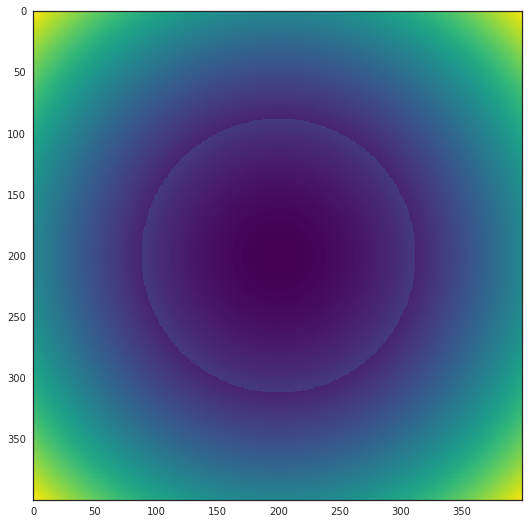

In [12]:
fig = plt.figure(figsize=(9,9))
img = plt.imshow(Z2, cmap=plt.cm.viridis)

# kinds of visualization 

## Scatter
When we want to show relationship between two variables:

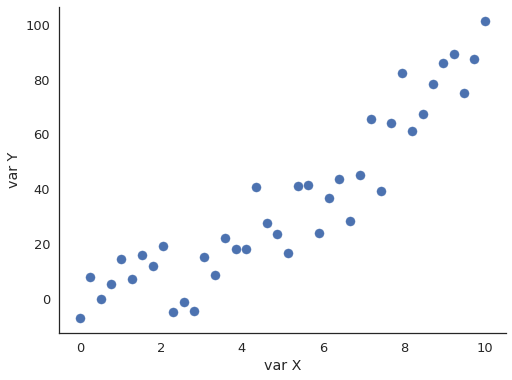

In [13]:
import seaborn as sns
sns.set_context('talk')

np.random.seed(13)

x = np.linspace(0,10,40)
y = x**2 + np.random.randn(40)*10


fig, ax = plt.subplots(figsize=(8,6))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(x,y)
ax.set_xlabel('var X')
ax.set_ylabel('var Y')
plt.show()

We can add more visual attributes to the scatter plot to represent more dimensions: 

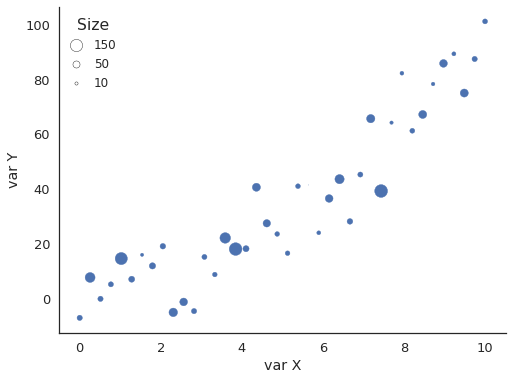

In [14]:
np.random.seed(13)

x = np.linspace(0,10,40)
y = x**2 + np.random.randn(40)*10
s = (np.random.randn(40)+2)**2*10

fig, ax = plt.subplots(figsize=(8,6))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.scatter(x,y, s=s)
ax.set_xlabel('var X')
ax.set_ylabel('var Y')

# -----------------
# Point size legend
# -----------------
# Define 3 dummy points ([],[]: not ploted)
l1 = plt.scatter([],[], s=150,c='w', edgecolors='k')
l2 = plt.scatter([],[], s=50,c='w', edgecolors='k')
l3 = plt.scatter([],[], s=10,c='w', edgecolors='k')
labels = [150, 50, 10]

leg = plt.legend([l1, l2, l3], labels, ncol=1, frameon=False, fontsize=12,
                handlelength=1, loc = 0,
                handletextpad=1, title='Size', scatterpoints = 1)

plt.show()

an even more with color:

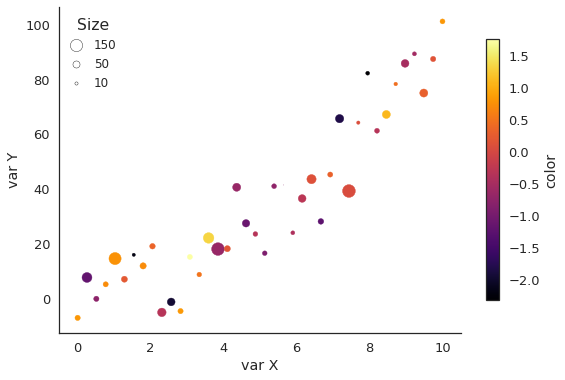

In [15]:
np.random.seed(13)

x = np.linspace(0,10,40)
y = x**2 + np.random.randn(40)*10
s = (np.random.randn(40)+2)**2*10
c = np.random.randn(40)

fig, ax = plt.subplots(figsize=(9,6))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('var X')
ax.set_ylabel('var Y')
p = ax.scatter(x,y, s=s, c=c, cmap='inferno')

# colorbar:

c = plt.colorbar(p, shrink = 0.8)
c.set_label("color")


# Point size legend:
# define 3 dummy points ([],[]: not ploted)

l1 = plt.scatter([],[], s=150,c='w', edgecolors='k')
l2 = plt.scatter([],[], s=50,c='w', edgecolors='k')
l3 = plt.scatter([],[], s=10,c='w', edgecolors='k')
labels = [150, 50, 10]

leg = plt.legend([l1, l2, l3], labels, ncol=1, frameon=False, fontsize=12,
                 handlelength=1, loc = 0, handletextpad=1,
                 title='Size', scatterpoints = 1)

plt.show(p)

### Or compare the distribution of different classes

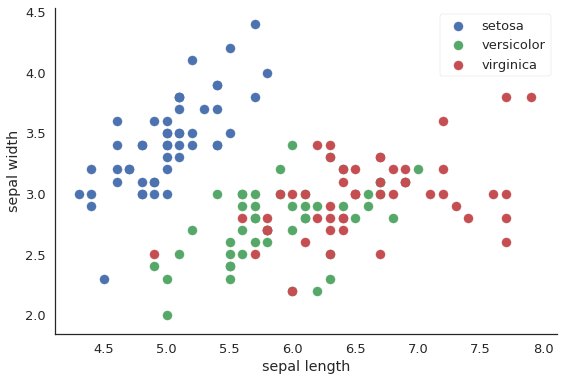

In [16]:
iris = sns.load_dataset('iris')
fig, ax = plt.subplots(figsize=(9,6))

# iterate over species and filter the data
for sp in iris.species.unique():
    x = iris[iris.species==sp]['sepal_length']
    y = iris[iris.species==sp]['sepal_width']
    ax.scatter(x, y, label=sp)

ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc=0, frameon=True)